In [21]:
import numpy as np 
import matplotlib.pyplot as plt
# imports the necessary libraries

<h1> Get the necessary functions to this work properly </h1>

In [22]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy_loss(predictions, targets):
    return -np.sum(targets * np.log(predictions + 1e-9)) / targets.shape[0]
def predict(x, W1, b1, W2, b2):
    z1 = np.dot(x, W1.T) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2.T) + b2
    y_hat = softmax(z2)
    return np.argmax(y_hat, axis=1)

def initialize_parameters(n_input=784, n_hidden=128, n_output=10):
    np.random.seed(42)
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    b1 = np.zeros(n_hidden)
    W2 = np.random.randn(n_output, n_hidden) * 0.01
    b2 = np.zeros(n_output)
    return W1, b1, W2, b2

def forward_propagation(x, W1, b1, W2, b2):
    z1 = np.dot(x, W1.T) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2.T) + b2
    y_hat = softmax(z2)
    return z1, a1, z2, y_hat
def backward_propagation(x, y, W1, b1, W2, b2, a1, y_hat):
    m = x.shape[0]

    delta_2 = y_hat - y
    dW2 = np.dot(delta_2.T, a1) / m
    db2 = np.sum(delta_2, axis=0) / m

    delta_1 = np.dot(delta_2, W2) * relu_derivative(a1)
    dW1 = np.dot(delta_1.T, x) / m
    db1 = np.sum(delta_1, axis=0) / m

    return dW1, db1, dW2, db2

def train(x_train, y_train, W1, b1, W2, b2, eta=0.01, epochs=1000):
    for epoch in range(epochs):
        z1, a1, z2, y_hat = forward_propagation(x_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(x_train, y_train, W1, b1, W2, b2, a1, y_hat)

        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2

        if epoch % 100 == 0:
            loss = cross_entropy_loss(y_hat, y_train)
            print(f"Epoch {epoch}, Loss: {loss}")

    return W1, b1, W2, b2
def load_mnist():
    from tensorflow.keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784) / 255.0
    x_test = x_test.reshape(-1, 784) / 255.0
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]
    return x_train, y_train, x_test, y_test

if __name__ == "__main__":
    x_train, y_train, x_test, y_test = load_mnist()
    n_input, n_hidden, n_output = 784, 128, 10
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden, n_output)

    eta = 0.01
    epochs = 1000
    W1, b1, W2, b2 = train(x_train, y_train, W1, b1, W2, b2, eta, epochs)

    test_predictions = predict(x_test, W1, b1, W2, b2)
    test_labels = np.argmax(y_test, axis=1)

    accuracy = np.mean(test_predictions == test_labels)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 0, Loss: 2.302835538008445
Epoch 100, Loss: 2.290454936562869
Epoch 200, Loss: 2.2682368259421954
Epoch 300, Loss: 2.221310489645795
Epoch 400, Loss: 2.1265797567187414
Epoch 500, Loss: 1.9596776668007356
Epoch 600, Loss: 1.7191549399285655
Epoch 700, Loss: 1.453242014132474
Epoch 800, Loss: 1.2257548469071797
Epoch 900, Loss: 1.054721144217351
Test Accuracy: 79.69%


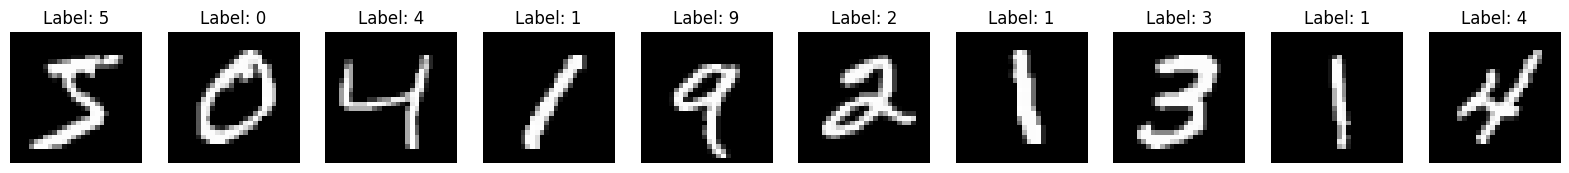

In [23]:
import matplotlib.pyplot as plt

# Load the MNIST dataset
x_train, y_train, x_test, y_test = load_mnist()

# Plot the first 10 figures from the dataset
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {np.argmax(y_train[i])}')

plt.show()


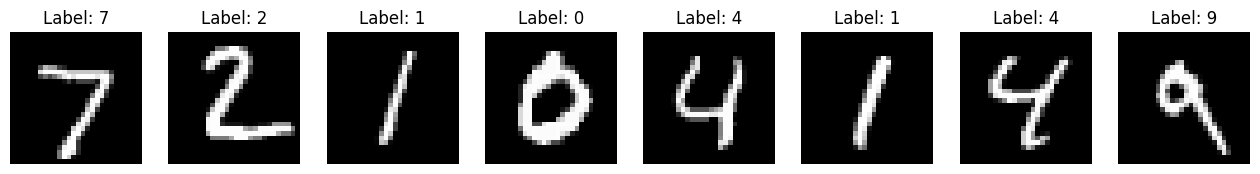

In [24]:
import matplotlib.pyplot as plt

# Assuming you've already loaded the MNIST data using load_mnist
x_train, y_train, x_test, y_test = load_mnist()

# Plot 8 figures from the test set
fig, axes = plt.subplots(1, 8, figsize=(16, 2))  # Adjust the figsize to ensure the images are displayed nicely
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {np.argmax(y_test[i])}')

plt.show()

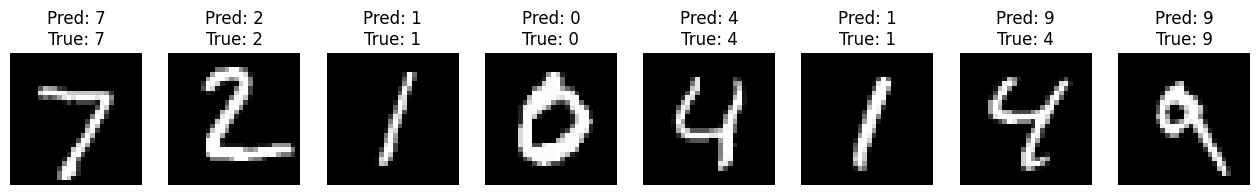

In [25]:
fig, axes = plt.subplots(1, 8, figsize=(16, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Pred: {test_predictions[i]}\nTrue: {test_labels[i]}')

plt.show()